In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# NLP
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [2]:
df = pd.read_csv("data/data_clean.csv").iloc[:, 1:]
# Remove jobs not pertaining to data science
df = df[df.title.notnull()].reset_index(drop=True)

In [3]:
df.location.value_counts()

San Francisco          271
Los Angeles             90
San Diego               80
Santa Clara             78
Mountain View           72
                      ... 
San Juan Capistrano      1
Rialto                   1
Yorba Linda              1
Watsonville              1
Azusa                    1
Name: location, Length: 134, dtype: int64

In [4]:
# Job description length
df["desc_len"] = df["Job Description"].apply(lambda x: len(x))
df["desc_len"]

0       3390
1       3633
2       3986
3       3093
4       1188
        ... 
1267    3669
1268    1703
1269    1901
1270    3826
1271    5668
Name: desc_len, Length: 1272, dtype: int64

In [5]:
 df.describe()

Rating          age       python            R        spark  \
count  1272.000000  1272.000000  1272.000000  1272.000000  1272.000000   
mean      3.452987    23.709119     0.648585     0.262579     0.249214   
std       1.512822    33.980283     0.477600     0.440208     0.432728   
min      -1.000000    -1.000000     0.000000     0.000000     0.000000   
25%       3.400000     4.000000     0.000000     0.000000     0.000000   
50%       3.900000    13.000000     1.000000     0.000000     0.000000   
75%       4.200000    31.000000     1.000000     1.000000     0.000000   
max       5.000000   338.000000     1.000000     1.000000     1.000000   

               aws        excel          sql  min_salary  max_salary  \
count  1272.000000  1272.000000  1272.000000  878.000000  878.000000   
mean      0.250000     0.459906     0.582547   92.197039  149.957859   
std       0.433183     0.498586     0.493333   33.293945   49.645372   
min       0.000000     0.000000     0.000000   27.000000   54.000000   
25%       0.000000     0.000000     0.000000   66.000000  114.000000   
50%       0.000000     0.000000     1.000000   91.000000  145.000000   
75%       0.250000     1.000000     1.000000  116.000000  185.750000   
max       1.000000     1.000000     1.000000  212.000000  334.000000   

       avg_salary  employer_provided      desc_len  
count  878.000000             1272.0   1272.000000  
mean   121.077449                0.0   3418.022013  
std     40.872730                0.0   1657.696620  
min     40.500000                0.0    132.000000  
25%     91.500000                0.0   2229.000000  
50%    119.500000                0.0   3352.000000  
75%    149.875000                0.0   4368.000000  
max    271.500000                0.0  17777.000000

In [6]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'title',
       'seniority', 'company_txt', 'location', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'sql', 'min_salary', 'max_salary', 'avg_salary',
       'employer_provided', 'desc_len', 'locational_salary_quantiles'],
      dtype='object')

<AxesSubplot:>

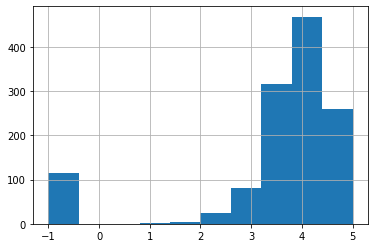

In [7]:
df.Rating.hist()

<AxesSubplot:>

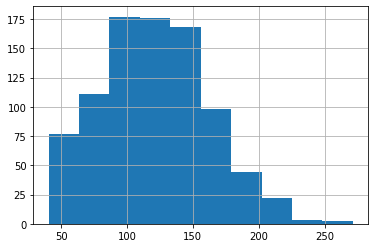

In [8]:
df.avg_salary.hist()

<AxesSubplot:>

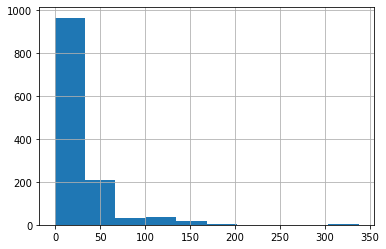

In [9]:
df.age.hist()

<AxesSubplot:>

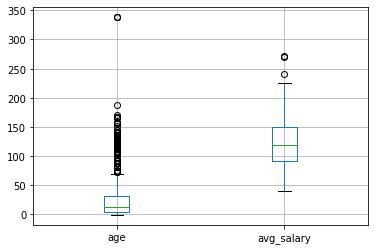

In [10]:
df.boxplot(column=['age', 'avg_salary'])

<AxesSubplot:>

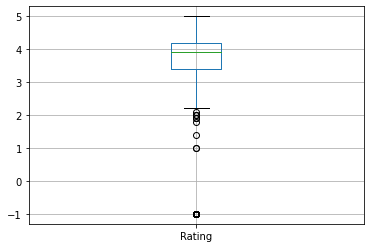

In [11]:
df.boxplot(column=['Rating'])

In [12]:
corr = df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()
corr

age  avg_salary    Rating  desc_len
age         1.000000   -0.096895  0.171007  0.264236
avg_salary -0.096895    1.000000  0.157876  0.079204
Rating      0.171007    0.157876  1.000000  0.085475
desc_len    0.264236    0.079204  0.085475  1.000000

<AxesSubplot:>

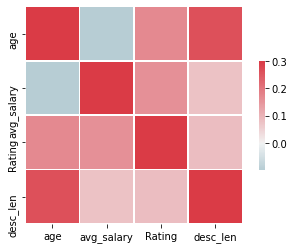

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap,
    square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [14]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'title',
       'seniority', 'company_txt', 'location', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'sql', 'min_salary', 'max_salary', 'avg_salary',
       'employer_provided', 'desc_len', 'locational_salary_quantiles'],
      dtype='object')

## Bar plots of categorical data

In [15]:
# Categorical
df_cat = df[['Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt',
    'location', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'seniority']]

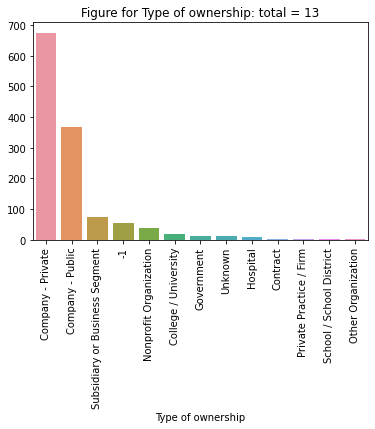

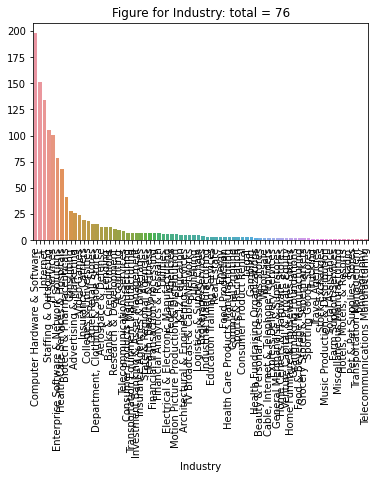

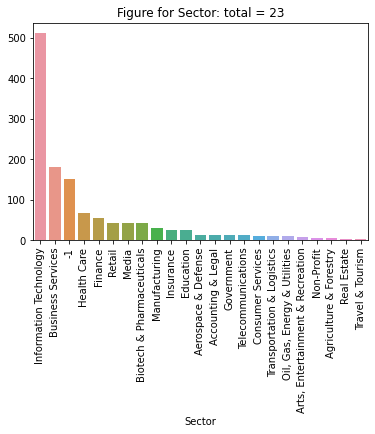

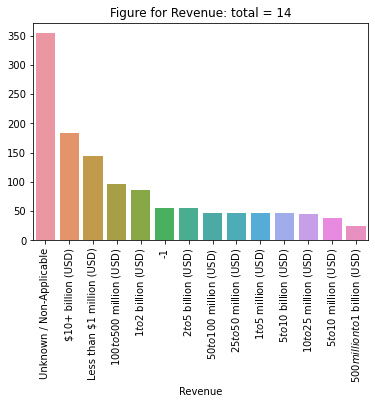

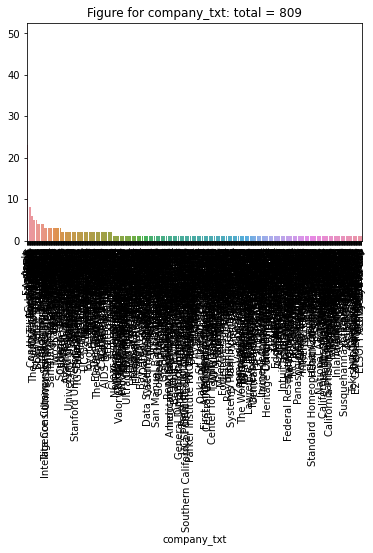

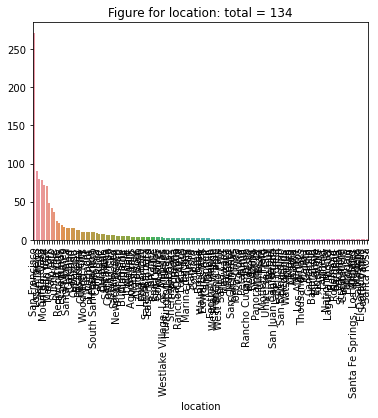

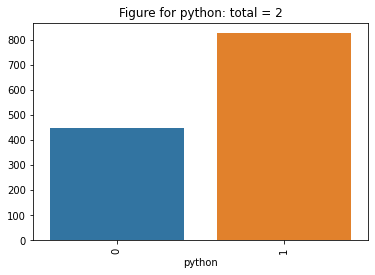

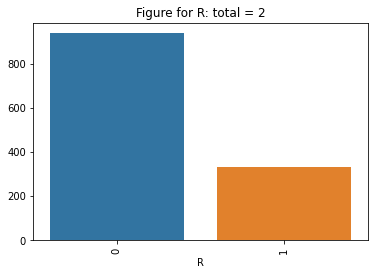

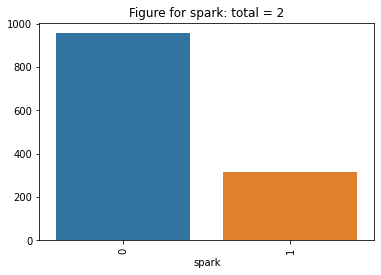

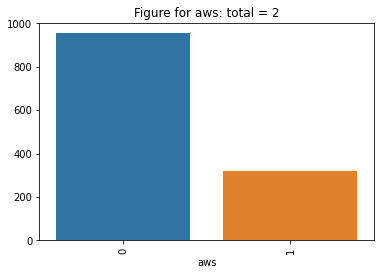

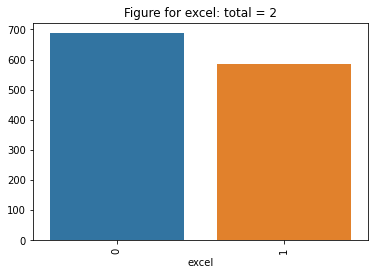

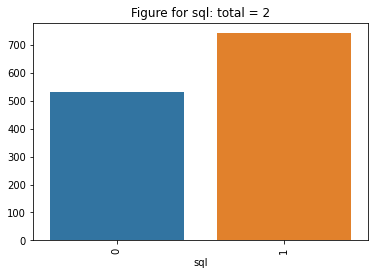

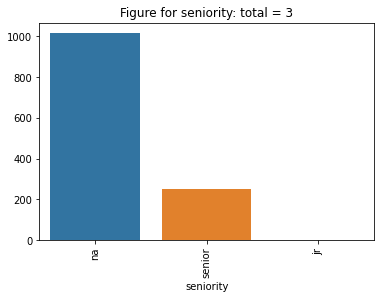

In [58]:
# Barplots of categorical features
for category in df_cat.columns:
    cat_values = df[category].value_counts()
    fig = sns.barplot(x=cat_values.index, y=cat_values)
    plt.title("Figure for {}: total = {}".format(category, len(cat_values)))
    plt.ylabel("")
    plt.xlabel(category)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.show()

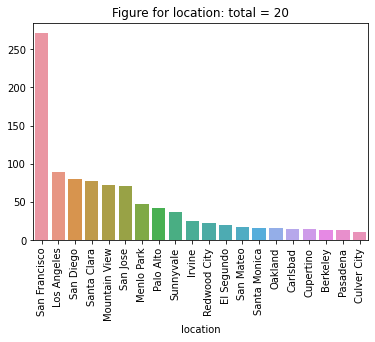

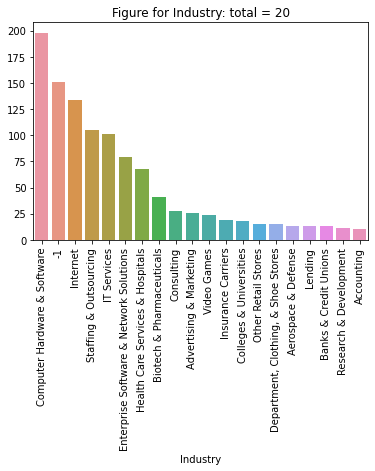

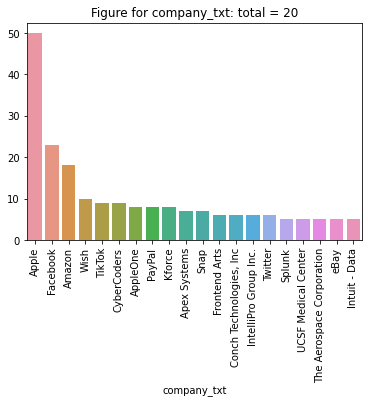

In [60]:
# Limit features with high number of categories
for category in ['location', 'Industry', 'company_txt']:
    cat_values = df[category].value_counts()[:20]
    fig = sns.barplot(x=cat_values.index, y=cat_values)
    plt.title("Figure for {}: total = {}".format(category, len(cat_values)))
    plt.ylabel("")
    plt.xlabel(category)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.show()

In [41]:
df.columns 

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'title',
       'seniority', 'company_txt', 'location', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'sql', 'min_salary', 'max_salary', 'avg_salary',
       'employer_provided', 'desc_len'],
      dtype='object')

## Pivot tables

In [16]:
pd.pivot_table(df, index='title', values='avg_salary')

avg_salary
title                       
Data Analysis      81.447876
Data Engineering  123.700637
Data Science      135.585034
ML Engineering    154.333333

In [17]:
pd.pivot_table(df, index=['title', 'seniority'], values='avg_salary')

avg_salary
title            seniority            
Data Analysis    jr          41.500000
                 na          73.701571
                 senior     104.126866
Data Engineering na         119.067669
                 senior     149.375000
Data Science     na         127.820000
                 senior     160.905797
ML Engineering   na         148.097015
                 senior     178.911765

In [18]:
pd.pivot_table(df, index='location', values='avg_salary').sort_values('avg_salary', ascending=False).head(15)

avg_salary
location                       
Los Altos            183.833333
Belmont              165.500000
Emeryville           164.500000
Sherman Oaks         156.250000
Brisbane             152.000000
Santa Clara          148.978571
Campbell             148.500000
Pleasanton           145.666667
Hayward              145.000000
Palo Alto            144.050000
Cupertino            143.222222
South San Francisco  139.750000
Menlo Park           139.431034
Rosemead             138.000000
San Francisco        137.890374

Next we will label the data based on locational avg_salary quantiles

In [19]:
# Group by location and aggregate by mean
location_salaries = df.groupby('location').avg_salary.mean()
# Compute quantiles: 25, 50, 75
q25 = location_salaries.quantile(.25)
q50 = location_salaries.quantile(.5)
q75 = location_salaries.quantile(.75)
# Label locations
location_labels = {}
for location in location_salaries.index:
    salary = location_salaries[location]
    # Ensure unique locations 
    if location in location_labels.keys():
        print("ValueError: {} already in dictionat".format(location))
    # Fill dictionary
    if salary < q25:
        location_labels[location] = "< 25th"
    elif salary > q75:
        location_labels[location] = "75th"
    elif (salary >= q25) and (salary < q50):
        location_labels[location] = "25th"
    else:
        location_labels[location] = "50th"
# Label data
df["locational_salary_quantiles"] = df.location.apply(
    lambda x: location_labels[x])
df["locational_salary_quantiles"].value_counts()

# Save new feature
df.to_csv("data/data_clean.csv")

In [20]:
pd.pivot_table(df, index=['location', 'title'], values='avg_salary').sort_values('avg_salary', ascending=False).head(50)

avg_salary
location            title                       
Los Altos           Data Science      205.500000
Woodland Hills      Data Engineering  195.000000
Pleasanton          ML Engineering    182.500000
Los Altos           ML Engineering    173.000000
San Francisco       ML Engineering    171.854167
San Bruno           Data Science      170.500000
Newark              ML Engineering    170.500000
Brisbane            Data Analysis     170.000000
Santa Clara         ML Engineering    169.120690
San Mateo           Data Engineering  166.750000
Belmont             ML Engineering    165.500000
Palo Alto           ML Engineering    165.250000
Emeryville          Data Science      164.500000
San Jose            ML Engineering    163.700000
Santa Monica        Data Science      162.166667
Alameda             Data Engineering  160.500000
Sherman Oaks        Data Science      156.250000
Menlo Park          Data Science      155.466667
South San Francisco Data Engineering  154.166667
Cupertino           Data Science      154.000000
Berkeley            ML Engineering    151.500000
Redwood City        ML Engineering    151.100000
Fremont             Data Engineering  151.000000
East Palo Alto      Data Science      150.500000
Cupertino           Data Engineering  149.250000
Campbell            Data Engineering  148.500000
Newark              Data Science      148.000000
San Francisco       Data Science      147.812500
Cupertino           ML Engineering    147.500000
Sunnyvale           ML Engineering    147.333333
Palo Alto           Data Science      146.500000
Hayward             ML Engineering    145.000000
Culver City         ML Engineering    145.000000
Santa Clara         Data Science      144.866667
                    Data Engineering  144.571429
Foster City         Data Science      143.750000
Union City          ML Engineering    143.500000
Sunnyvale           Data Science      143.200000
San Mateo           Data Science      143.000000
East Palo Alto      ML Engineering    142.000000
Santa Barbara       ML Engineering    142.000000
Mountain View       Data Science      141.875000
Pleasanton          Data Science      141.666667
Livermore           Data Science      140.500000
Marina del Rey      ML Engineering    140.000000
Pleasanton          Data Engineering  139.250000
Rosemead            Data Analysis     138.000000
San Jose            Data Science      137.911765
Palmdale            Data Analysis     137.000000
Alameda             Data Science      137.000000

In [21]:
pd.pivot_table(df, index=['location', 'title'], values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False).head(50)

avg_salary
location       title                       
San Francisco  Data Science              72
               ML Engineering            48
               Data Analysis             43
Santa Clara    ML Engineering            29
Los Angeles    Data Analysis             29
San Francisco  Data Engineering          24
San Diego      Data Analysis             21
Los Angeles    Data Science              19
San Jose       Data Science              17
               Data Engineering          16
San Diego      Data Science              16
Mountain View  Data Science              16
Santa Clara    Data Science              15
Menlo Park     Data Science              15
Santa Clara    Data Engineering          14
Mountain View  ML Engineering            14
San Jose       Data Analysis             13
Los Angeles    Data Engineering          12
Santa Clara    Data Analysis             12
Sunnyvale      Data Engineering          11
Palo Alto      Data Science              11
San Jose       ML Engineering            10
Palo Alto      ML Engineering            10
San Diego      ML Engineering            10
Menlo Park     Data Engineering           9
San Diego      Data Engineering           9
Irvine         Data Science               7
               Data Engineering           6
El Segundo     Data Analysis              6
Pleasanton     Data Science               6
Redwood City   Data Science               6
Santa Monica   Data Analysis              6
Orange         Data Analysis              6
Palo Alto      Data Engineering           6
Sunnyvale      ML Engineering             6
               Data Analysis              5
Carlsbad       Data Analysis              5
Sunnyvale      Data Science               5
El Segundo     Data Science               5
San Mateo      Data Analysis              5
Culver City    Data Science               5
Redwood City   ML Engineering             5
Menlo Park     Data Analysis              4
Mountain View  Data Engineering           4
San Mateo      Data Science               4
Cupertino      ML Engineering             4
Los Angeles    ML Engineering             4
Woodland Hills Data Analysis              4
Berkeley       Data Science               4
Burbank        Data Engineering           4

In [22]:
pd.pivot_table(df[df.title == 'Data Science'], index=['location', 'title'], values='avg_salary').sort_values('avg_salary', ascending=False).head(15)

avg_salary
location       title                   
Los Altos      Data Science  205.500000
San Bruno      Data Science  170.500000
Emeryville     Data Science  164.500000
Santa Monica   Data Science  162.166667
Sherman Oaks   Data Science  156.250000
Menlo Park     Data Science  155.466667
Cupertino      Data Science  154.000000
East Palo Alto Data Science  150.500000
Newark         Data Science  148.000000
San Francisco  Data Science  147.812500
Palo Alto      Data Science  146.500000
Santa Clara    Data Science  144.866667
Foster City    Data Science  143.750000
Sunnyvale      Data Science  143.200000
San Mateo      Data Science  143.000000

In [23]:
# Data science jobs only
df_ds = df[df.title == 'Data Science']

In [24]:
# Columns selection for pivot tables
df_pivots = df_ds[['Industry', 'Sector', 'Revenue', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'desc_len', 'avg_salary']]

In [25]:
for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values(by='avg_salary', ascending=False))
    print("-"*75)

Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       179.000000
Miscellaneous Manufacturing               161.000000
Wholesale                                 160.500000
Real Estate                               158.500000
Department, Clothing, & Shoe Stores       151.625000
Biotech & Pharmaceuticals                 149.250000
Education Training Services               144.250000
Transportation Equipment Manufacturing    144.000000
Farm Support Services                     144.000000
Computer Hardware & Software              143.858696
Internet                                  143.630435
Enterprise Software & Network Solutions   143.586957
K-12 Education                            143.000000
Photography                               140.000000
Insurance Agencies & Brokerages           138.500000
Advertising & Marketing                   138.333333
Video Games                          

In [26]:
pd.pivot_table(df_pivots, index='Revenue', columns='python', values='avg_salary', aggfunc="count")

python                               0     1
Revenue                                     
$1 to $2 billion (USD)             2.0  23.0
$1 to $5 million (USD)             0.0   7.0
$10 to $25 million (USD)           1.0  11.0
$10+ billion (USD)                12.0  53.0
$100 to $500 million (USD)         4.0  25.0
$2 to $5 billion (USD)             NaN  10.0
$25 to $50 million (USD)           5.0   5.0
$5 to $10 billion (USD)            1.0  24.0
$5 to $10 million (USD)            1.0   6.0
$50 to $100 million (USD)          1.0   8.0
$500 million to $1 billion (USD)   NaN   2.0
-1                                 0.0   0.0
Less than $1 million (USD)         2.0   9.0
Unknown / Non-Applicable          12.0  70.0

## Word clouds of different job roles

In [27]:
df.title.value_counts()

Data Analysis       415
Data Science        393
Data Engineering    246
ML Engineering      218
Name: title, dtype: int64

In [32]:
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

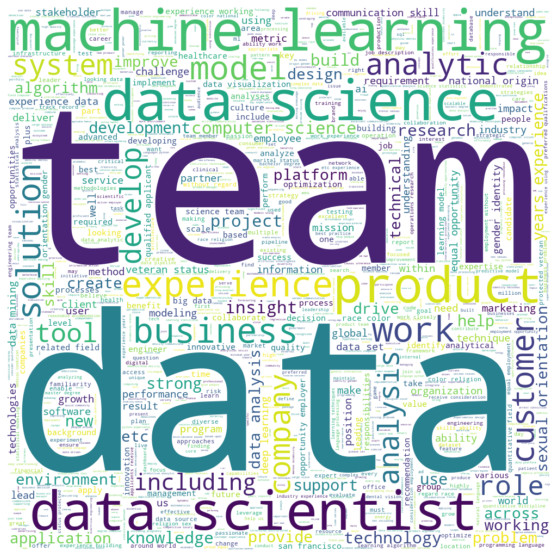

In [33]:
# Data science
words = " ".join(df_ds['Job Description'])

# nltk.download('stopwords')
# nltk.download('punkt')

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =1000, height = 1000)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

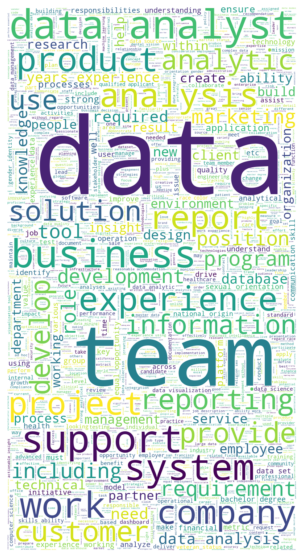

In [55]:
# Data analytics
df_da = df[df.title == "Data Analysis"]
words = " ".join(df_da['Job Description'])

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =1000, height = 1000)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

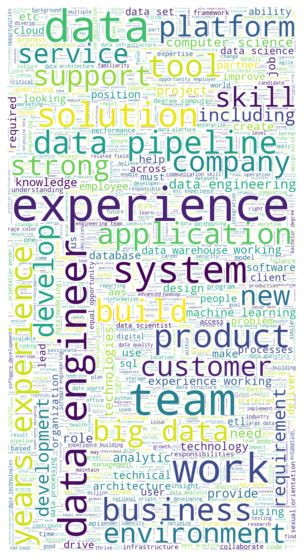

In [56]:
# Data Engineering
df_de = df[df.title == "Data Engineering"]
words = " ".join(df_de['Job Description'])

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =1000, height = 1000)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

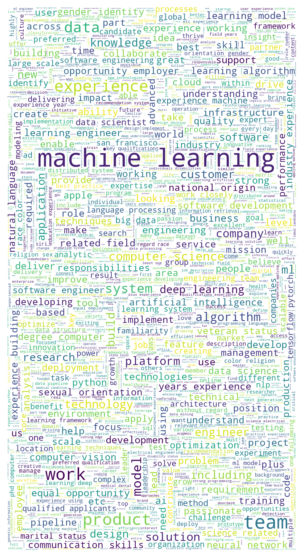

In [57]:
# ML Engineering
df_ml = df[df.title == "ML Engineering"]
words = " ".join(df_ml['Job Description'])

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =1000, height = 1000)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()